In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [88]:
df = pd.read_csv("data/train.csv")
labels = df.TARGET
df.drop(["ID", "TARGET"], axis=1, inplace=1)

### Масштабирование признаков в случае регуляризированной линейной модели

In [89]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import scale, minmax_scale, maxabs_scale, robust_scale

X = df.values
y = labels

print 'w/o scaling', "{0:.3f}".format(cross_val_score(lr, X, y, scoring='neg_log_loss', ).mean())
print 'normalize', "{0:.3f}".format(cross_val_score(lr, scale(X), y, scoring='neg_log_loss', ).mean())
print 'min-max', "{0:.3f}".format(cross_val_score(lr, minmax_scale(X), y, scoring='neg_log_loss', ).mean())
print 'max-abs', "{0:.3f}".format(cross_val_score(lr, maxabs_scale(X), y, scoring='neg_log_loss', ).mean())
print 'robust_scale', "{0:.3f}".format(cross_val_score(lr, robust_scale(X), y, scoring='neg_log_loss', ).mean())

w/o scaling -0.439
normalize -0.150
min-max -0.147
max-abs -0.147
robust_scale -0.673


In [125]:
# просто готовим данные, на эту ячейку можно забить
patterns = ["var39", "var40", "var41", "var46", "medio", "corto", "largo", "saldo", 
            "delta", "imp", "meses", "reemb", "ult", "hace", "_0"]
columns_to_drop = filter(lambda x: any(pattern in x for pattern in patterns), df.columns)
df.drop(columns_to_drop, axis=1, inplace=1)

df.var3 = df.var3.replace(-999999, np.nan)
df.loc[df.var15 == 22] = np.nan

### Разделить признаки на категориальные и вещественные можно взглянув на количество уникальных значений (не всегда)

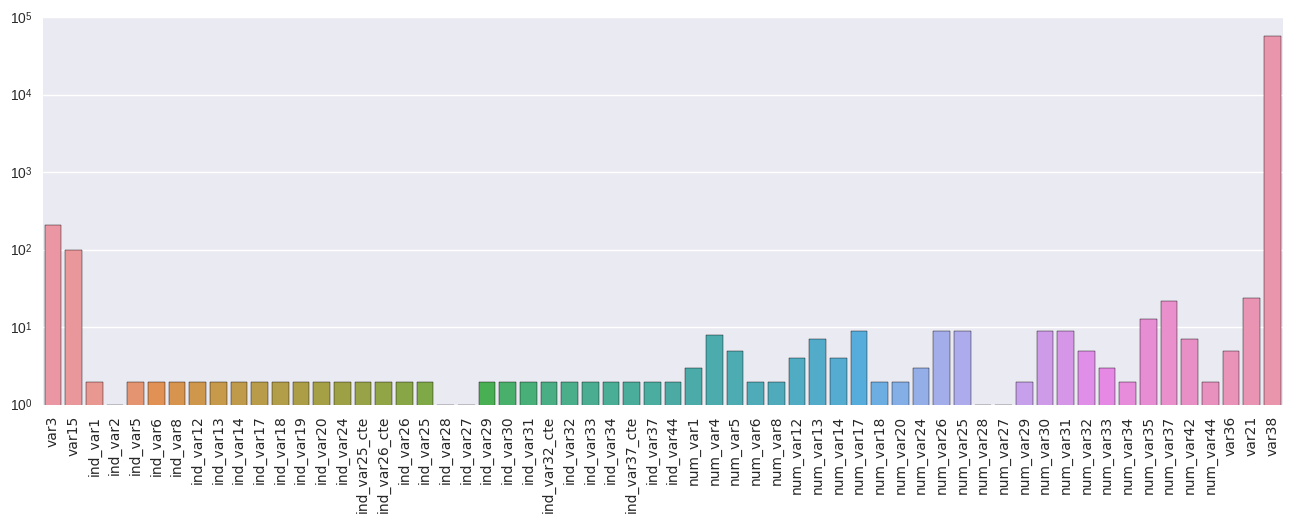

In [126]:
plt.figure(figsize=(16, 5))
sns.barplot(x=df.columns, y=map(lambda x: df[x].nunique(), df))
_ = plt.xticks(rotation=90)
plt.yscale("log")

In [127]:
numerical = filter(lambda x: x.startswith("num"), df.columns) + ["var21", "var38"]
categorial = filter(lambda x: x not in numerical, df.columns)

### 1. Кодирование строковых признаков

In [110]:
names1 = ["zero", "one", "two"]
feature1 = np.random.choice(names1, size=10)
feature2 = np.random.randint(3, 6, 10)
X = pd.DataFrame({"string_feature": feature1, "cat_feature": feature2})
X

,cat_feature,string_feature
0,4,two
1,5,one
2,3,two
3,5,two
4,4,two
5,4,two
6,3,two
7,3,one
8,3,two
9,3,one


In [111]:
pd.factorize(X.string_feature)

(array([0, 1, 0, 0, 0, 0, 0, 1, 0, 1]),
 Index([u'two', u'one'], dtype='object'))

In [112]:
X["string_feature"] = pd.factorize(X.string_feature)[0]
X

,cat_feature,string_feature
0,4,0
1,5,1
2,3,0
3,5,0
4,4,0
5,4,0
6,3,0
7,3,1
8,3,0
9,3,1


### 2. Избавление от пропусков в данных

In [137]:
filter(lambda x: x[1], [(col, df[col].isnull().any()) for col in df])

[('var3', True),
 ('var15', True),
 ('ind_var1', True),
 ('ind_var2', True),
 ('ind_var5', True),
 ('ind_var6', True),
 ('ind_var8', True),
 ('ind_var12', True),
 ('ind_var13', True),
 ('ind_var14', True),
 ('ind_var17', True),
 ('ind_var18', True),
 ('ind_var19', True),
 ('ind_var20', True),
 ('ind_var24', True),
 ('ind_var25_cte', True),
 ('ind_var26_cte', True),
 ('ind_var26', True),
 ('ind_var25', True),
 ('ind_var28', True),
 ('ind_var27', True),
 ('ind_var29', True),
 ('ind_var30', True),
 ('ind_var31', True),
 ('ind_var32_cte', True),
 ('ind_var32', True),
 ('ind_var33', True),
 ('ind_var34', True),
 ('ind_var37_cte', True),
 ('ind_var37', True),
 ('ind_var44', True),
 ('num_var1', True),
 ('num_var4', True),
 ('num_var5', True),
 ('num_var6', True),
 ('num_var8', True),
 ('num_var12', True),
 ('num_var13', True),
 ('num_var14', True),
 ('num_var17', True),
 ('num_var18', True),
 ('num_var20', True),
 ('num_var24', True),
 ('num_var26', True),
 ('num_var25', True),
 ('num_var28'

In [228]:
df.fillna(0).head(10)

,var3,var15,ind_var1,ind_var2,ind_var5,ind_var6,ind_var8,ind_var12,ind_var13,ind_var14,...,num_var32,num_var33,num_var34,num_var35,num_var37,num_var42,num_var44,var36,var21,var38
0,2.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,99.0,0.0,39205.170000
1,2.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,3.0,0.0,49278.030000
2,2.0,23.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,3.0,0.0,99.0,0.0,67333.770000
3,2.0,37.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,9.0,6.0,3.0,0.0,2.0,0.0,64007.970000
4,2.0,39.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,3.0,0.0,1.0,0.0,117310.979016
5,2.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,99.0,0.0,87975.750000
6,2.0,27.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,3.0,0.0,3.0,0.0,94956.660000
7,2.0,26.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,3.0,0.0,2.0,0.0,251638.950000
8,2.0,45.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,99.0,0.0,101962.020000
9,2.0,25.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,3.0,0.0,2.0,0.0,356463.060000


In [155]:
from sklearn.preprocessing import Imputer

"""
strategy : string, optional (default="mean")
    The imputation strategy.

    - If "mean", then replace missing values using the mean along
      the axis.
    - If "median", then replace missing values using the median along
      the axis.
    - If "most_frequent", then replace missing using the most frequent
      value along the axis.
"""

imp = Imputer()
df_imputed = pd.DataFrame(imp.fit_transform(df), columns=df.columns)

In [156]:
filter(lambda x: x[1], [(col, df_imputed[col].isnull().any()) for col in df_imputed])

[]

## 3. Кодирование категориальных признаков

### 3.1 One-hot (dummy encoding)

In [157]:
from sklearn.preprocessing import OneHotEncoder

categorial_indices = map(lambda x: x in categorial, df.columns)
ohe = OneHotEncoder(categorical_features=categorial_indices)
ohe.fit(df_imputed)
df_encoded = ohe.transform(df_imputed)

In [158]:
print df_imputed.shape 
df_encoded

(76020, 60)


<76020x395 sparse matrix of type '<type 'numpy.float64'>'
	with 2824378 stored elements in COOrdinate format>

### 3.2 Count encoding

In [172]:
from __future__ import division

df_count_encoded = df_imputed.copy()

def code_freq(data, col):
    return data[col].map(data.groupby(col).count().iloc[:, 0] / data.shape[0])

for col in categorial:
    df_count_encoded[col] = code_freq(df_count_encoded, col)
df_count_encoded.head(10)

,var3,var15,ind_var1,ind_var2,ind_var5,ind_var6,ind_var8,ind_var12,ind_var13,ind_var14,...,num_var32,num_var33,num_var34,num_var35,num_var37,num_var42,num_var44,var36,var21,var38
0,0.96326,0.265325,0.983873,1.0,0.335517,0.987609,0.95905,0.942252,0.936780,0.982334,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.394344,0.0,39205.170000
1,0.96326,0.019587,0.983873,1.0,0.335517,0.987609,0.95905,0.942252,0.050855,0.982334,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.286701,0.0,49278.030000
2,0.96326,0.265325,0.983873,1.0,0.652118,0.987609,0.95905,0.942252,0.936780,0.982334,...,0.0,0.0,0.0,3.0,0.0,3.0,0.0,0.394344,0.0,67333.770000
3,0.96326,0.018429,0.983873,1.0,0.652118,0.987609,0.95905,0.942252,0.936780,0.982334,...,0.0,0.0,0.0,9.0,6.0,3.0,0.0,0.113852,0.0,64007.970000
4,0.96326,0.017482,0.983873,1.0,0.335517,0.987609,0.95905,0.045383,0.936780,0.982334,...,0.0,0.0,0.0,3.0,0.0,3.0,0.0,0.192699,0.0,117310.979016
5,0.96326,0.265325,0.983873,1.0,0.335517,0.987609,0.95905,0.942252,0.936780,0.982334,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.394344,0.0,87975.750000
6,0.96326,0.037635,0.983873,1.0,0.652118,0.987609,0.95905,0.942252,0.936780,0.982334,...,0.0,0.0,0.0,3.0,0.0,3.0,0.0,0.286701,0.0,94956.660000
7,0.96326,0.043015,0.983873,1.0,0.652118,0.987609,0.95905,0.942252,0.936780,0.982334,...,0.0,0.0,0.0,3.0,0.0,3.0,0.0,0.113852,0.0,251638.950000
8,0.96326,0.013418,0.983873,1.0,0.335517,0.987609,0.95905,0.942252,0.936780,0.982334,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.394344,0.0,101962.020000
9,0.96326,0.055472,0.983873,1.0,0.652118,0.987609,0.95905,0.942252,0.936780,0.982334,...,0.0,0.0,0.0,3.0,0.0,3.0,0.0,0.113852,0.0,356463.060000


### 3.3 Mean target encoding

In [173]:
df_mean_encoded = df_imputed.copy()
df_mean_encoded['labels'] = labels

def code_mean(data, col):
    return data[col].map(data.groupby(col)['labels'].mean())

for col in categorial:
    df_mean_encoded[col] = code_mean(df_mean_encoded, col)
df_mean_encoded.head(10)

,var3,var15,ind_var1,ind_var2,ind_var5,ind_var6,ind_var8,ind_var12,ind_var13,ind_var14,...,num_var33,num_var34,num_var35,num_var37,num_var42,num_var44,var36,var21,var38,labels
0,0.040299,0.007437,0.03995,0.039569,0.076805,0.040065,0.039132,0.041561,0.041902,0.040173,...,0.0,0.0,0.0,0.0,0.0,0.0,0.064647,0.0,39205.170000,0
1,0.040299,0.064473,0.03995,0.039569,0.076805,0.040065,0.039132,0.041561,0.006208,0.040173,...,0.0,0.0,3.0,0.0,0.0,0.0,0.016885,0.0,49278.030000,0
2,0.040299,0.007437,0.03995,0.039569,0.021160,0.040065,0.039132,0.041561,0.041902,0.040173,...,0.0,0.0,3.0,0.0,3.0,0.0,0.064647,0.0,67333.770000,0
3,0.040299,0.067095,0.03995,0.039569,0.021160,0.040065,0.039132,0.041561,0.041902,0.040173,...,0.0,0.0,9.0,6.0,3.0,0.0,0.027845,0.0,64007.970000,0
4,0.040299,0.076749,0.03995,0.039569,0.076805,0.040065,0.039132,0.008986,0.041902,0.040173,...,0.0,0.0,3.0,0.0,3.0,0.0,0.031470,0.0,117310.979016,0
5,0.040299,0.007437,0.03995,0.039569,0.076805,0.040065,0.039132,0.041561,0.041902,0.040173,...,0.0,0.0,0.0,0.0,0.0,0.0,0.064647,0.0,87975.750000,0
6,0.040299,0.033555,0.03995,0.039569,0.021160,0.040065,0.039132,0.041561,0.041902,0.040173,...,0.0,0.0,3.0,0.0,3.0,0.0,0.016885,0.0,94956.660000,0
7,0.040299,0.024771,0.03995,0.039569,0.021160,0.040065,0.039132,0.041561,0.041902,0.040173,...,0.0,0.0,3.0,0.0,3.0,0.0,0.027845,0.0,251638.950000,0
8,0.040299,0.083333,0.03995,0.039569,0.076805,0.040065,0.039132,0.041561,0.041902,0.040173,...,0.0,0.0,0.0,0.0,0.0,0.0,0.064647,0.0,101962.020000,0
9,0.040299,0.015414,0.03995,0.039569,0.021160,0.040065,0.039132,0.041561,0.041902,0.040173,...,0.0,0.0,3.0,0.0,3.0,0.0,0.027845,0.0,356463.060000,0


### 3.3 Mean target encoding 2.0

In [232]:
from sklearn.base import BaseEstimator
from sklearn.model_selection import cross_val_predict, StratifiedKFold

class MeanEncoder(BaseEstimator):
    def __init__(self, col):
        self.col = col
        
    def fit(self, X, y):
        X['target'] = y
        self.encoding = X.groupby(col)['target'].mean()
        
    def predict(self, X):
        return X[col].map(self.encoding).fillna(-1)

cv = StratifiedKFold(n_splits=5, random_state=42)

df_mean_encoded_properly = df_imputed.copy()

for col in categorial:
    mean_encoder = MeanEncoder(col)
    df_mean_encoded_properly[col] = cross_val_predict(mean_encoder, df_imputed, labels, cv=cv)
df_mean_encoded_properly.head(10)

,var3,var15,ind_var1,ind_var2,ind_var5,ind_var6,ind_var8,ind_var12,ind_var13,ind_var14,...,num_var32,num_var33,num_var34,num_var35,num_var37,num_var42,num_var44,var36,var21,var38
0,0.040207,0.007954,0.039961,0.039563,0.077967,0.040049,0.039065,0.041571,0.041861,0.040164,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.064949,0.0,39205.170000
1,0.040207,0.065089,0.039961,0.039563,0.077967,0.040049,0.039065,0.041571,0.007038,0.040164,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.016337,0.0,49278.030000
2,0.040207,0.007954,0.039961,0.039563,0.020637,0.040049,0.039065,0.041571,0.041861,0.040164,...,0.0,0.0,0.0,3.0,0.0,3.0,0.0,0.064949,0.0,67333.770000
3,0.040207,0.066548,0.039961,0.039563,0.020637,0.040049,0.039065,0.041571,0.041861,0.040164,...,0.0,0.0,0.0,9.0,6.0,3.0,0.0,0.028963,0.0,64007.970000
4,0.040207,0.075145,0.039961,0.039563,0.077967,0.040049,0.039065,0.008355,0.041861,0.040164,...,0.0,0.0,0.0,3.0,0.0,3.0,0.0,0.031148,0.0,117310.979016
5,0.040207,0.007954,0.039961,0.039563,0.077967,0.040049,0.039065,0.041571,0.041861,0.040164,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.064949,0.0,87975.750000
6,0.040207,0.035714,0.039961,0.039563,0.020637,0.040049,0.039065,0.041571,0.041861,0.040164,...,0.0,0.0,0.0,3.0,0.0,3.0,0.0,0.016337,0.0,94956.660000
7,0.040207,0.024885,0.039961,0.039563,0.020637,0.040049,0.039065,0.041571,0.041861,0.040164,...,0.0,0.0,0.0,3.0,0.0,3.0,0.0,0.028963,0.0,251638.950000
8,0.040207,0.084894,0.039961,0.039563,0.077967,0.040049,0.039065,0.041571,0.041861,0.040164,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.064949,0.0,101962.020000
9,0.040207,0.015485,0.039961,0.039563,0.020637,0.040049,0.039065,0.041571,0.041861,0.040164,...,0.0,0.0,0.0,3.0,0.0,3.0,0.0,0.028963,0.0,356463.060000


### Проверим качество!

In [237]:
lr = LogisticRegression()
print "one-hot encoding: {0:.4f}".format(
    cross_val_score(lr, df_encoded, labels, scoring='neg_log_loss', n_jobs=-1).mean())
print "count encoding: {0:.4f}".format(
    cross_val_score(lr, df_count_encoded, labels, scoring='neg_log_loss', n_jobs=-1).mean())
print "mean encoding: {0:.4f}".format(
    cross_val_score(lr, df_mean_encoded_properly, labels, scoring='neg_log_loss', n_jobs=-1, cv=cv).mean())

one-hot encoding: -0.1628
count encoding: -0.1670
mean encoding: -0.1776


In [238]:
lr = RandomForestClassifier(n_estimators=100, n_jobs=-1)
print "one-hot encoding: {0:.4f}".format(
    cross_val_score(lr, df_encoded, labels, scoring='neg_log_loss', cv=cv).mean())
print "count encoding: {0:.4f}".format(
    cross_val_score(lr, df_count_encoded, labels, scoring='neg_log_loss', cv=cv).mean())
print "mean encoding: {0:.4f}".format(
    cross_val_score(lr, df_mean_encoded_properly, labels, scoring='neg_log_loss', cv=cv).mean())

one-hot encoding: -0.6129
count encoding: -0.5143
mean encoding: -0.2849


## Оценка силы признаков

### Корреляция

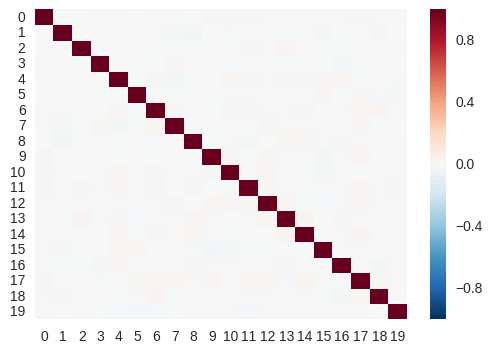

In [5]:
from sklearn.datasets import make_regression
import pandas as pd
import seaborn as sns
%matplotlib inline

X, y = make_regression(n_samples=10000, n_features=20)
d = pd.DataFrame(X)
sns.heatmap(d.corr())

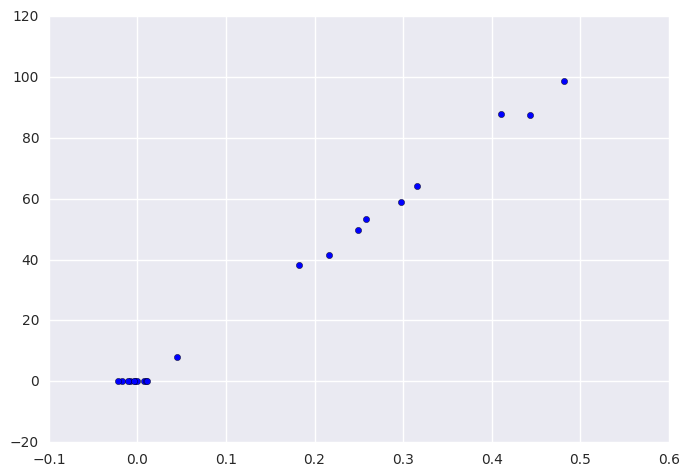

In [216]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr

X, y = make_regression(n_samples=10000, n_features=20)
lr = LinearRegression()
lr.fit(scale(X), y)
correlations = np.array([pearsonr(feature, y)[0] for feature in X.T])
plt.scatter(correlations, lr.coef_)

### Взаимная информация

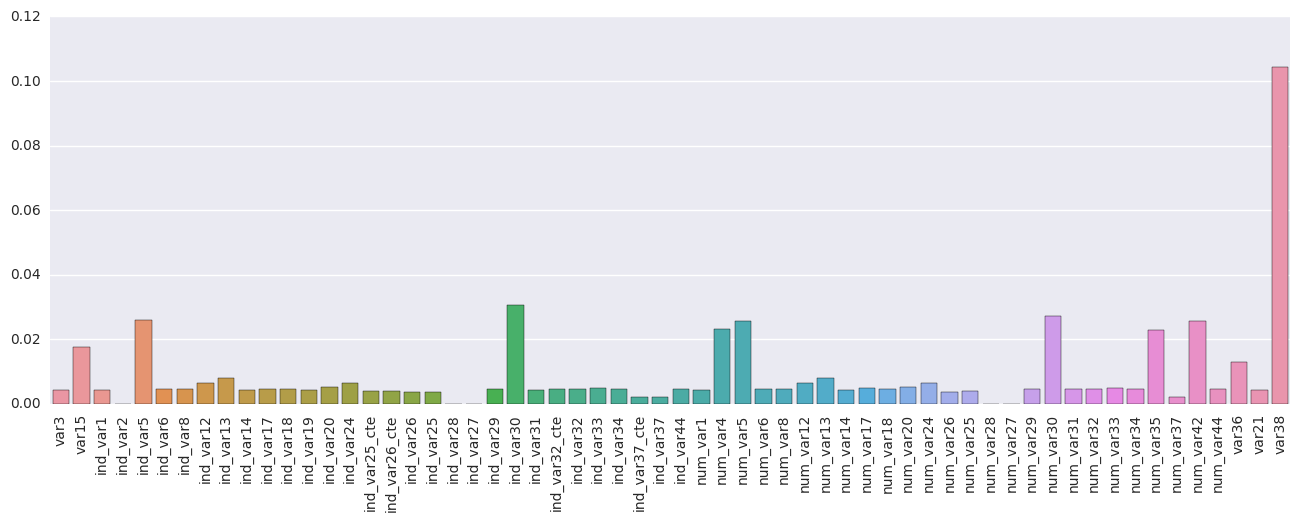

In [220]:
from sklearn.metrics import normalized_mutual_info_score

plt.figure(figsize=(16, 5))
sns.barplot(df_imputed.columns, [normalized_mutual_info_score(df_imputed[col], labels) for col in df.columns])
_ = plt.xticks(rotation=90)

### С помощью деревьев

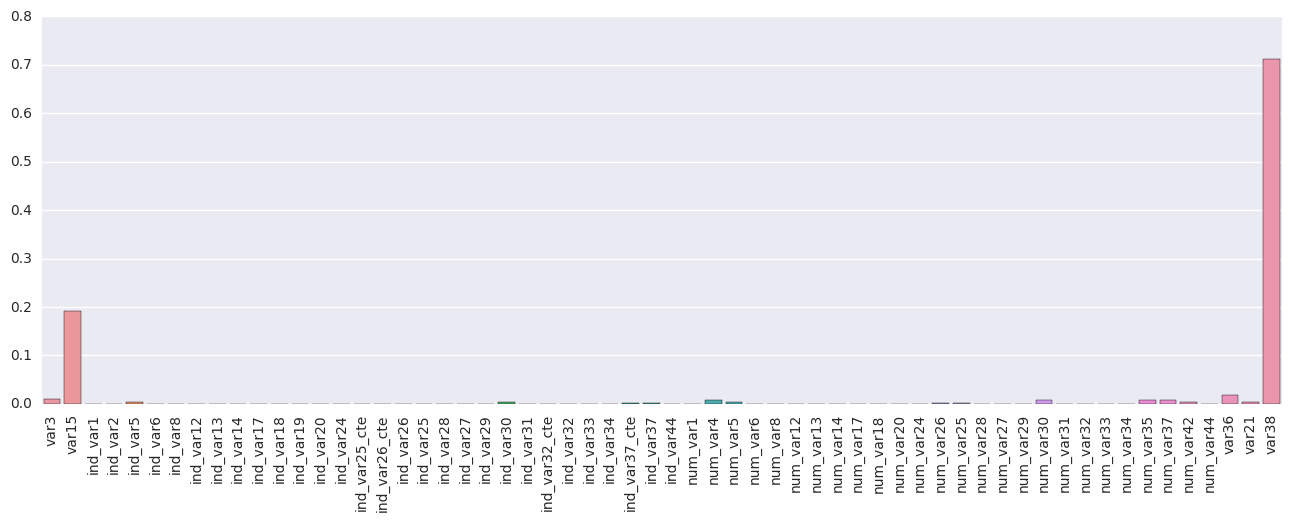

In [225]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, n_jobs=-1)
rf.fit(df_imputed, labels)

plt.figure(figsize=(16, 5))
sns.barplot(df_imputed.columns, rf.feature_importances_)
_ = plt.xticks(rotation=90)